**Bank Loan**

# Objective

The main objective of this project is to develop a model to predict whether a loan will be paid or charged off. 

***The specific goals of the project were to:***

1.   Analyzed the data, clean it and prepared the data for machine learning modelling.
2.   Develop several machine learning models, compare their performances and select the best model.

# Importing essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data:
# data source: https://www.kaggle.com/zaurbegiev/my-dataset
dataset = pd.read_csv('/content/drive/MyDrive/datasets/bank_loan/credit_train.csv')

# Exploratory Data Analysis

In [ ]:
dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
dataset.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**A few quick observations:**


1.   Loan ID and Customer ID columns are irrelavant
2.   NaN rows at the end of the table
3.   Column names have black spaces


In [ ]:
# Drop irrelativnet columns
dataset.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

# Replace space with underscore in the column names
dataset.columns = dataset.columns.str.replace(' ','_')

# the last 514 row are blank so we delete them
#dataset.tail(515)
dataset.drop(range(100000,100514),axis=0, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_Status                   100000 non-null  object 
 1   Current_Loan_Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit_Score                  80846 non-null   float64
 4   Annual_Income                 80846 non-null   float64
 5   Years_in_current_job          95778 non-null   object 
 6   Home_Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly_Debt                  100000 non-null  float64
 9   Years_of_Credit_History       100000 non-null  float64
 10  Months_since_last_delinquent  46859 non-null   float64
 11  Number_of_Open_Accounts       100000 non-null  float64
 12  Number_of_Credit_Problems     100000 non-null

**Years_in_current_job** is type string. It needs to be converted to numerical values.


In [ ]:
dataset.Years_in_current_job.value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years_in_current_job, dtype: int64

In [ ]:
dataset.Years_in_current_job = dataset.Years_in_current_job.map({'10+ years':10, '9 years':9, '8 years':8, '7 years':7, '6 years':6, '5 years':5,
                                                                 '4 years':4, '3 years':3, '2 years':2, '< 1 year':1,'NaN':None})

In [ ]:
dataset.Years_in_current_job.value_counts()

10.0    31121
2.0      9134
3.0      8169
1.0      8164
5.0      6787
4.0      6143
6.0      5686
7.0      5577
8.0      4582
9.0      3955
Name: Years_in_current_job, dtype: int64

In [ ]:
dataset.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,1.000000e+05,80846.000000,8.084600e+04,89318.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,6.337603,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,3.350033,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,7.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,10.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,10.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


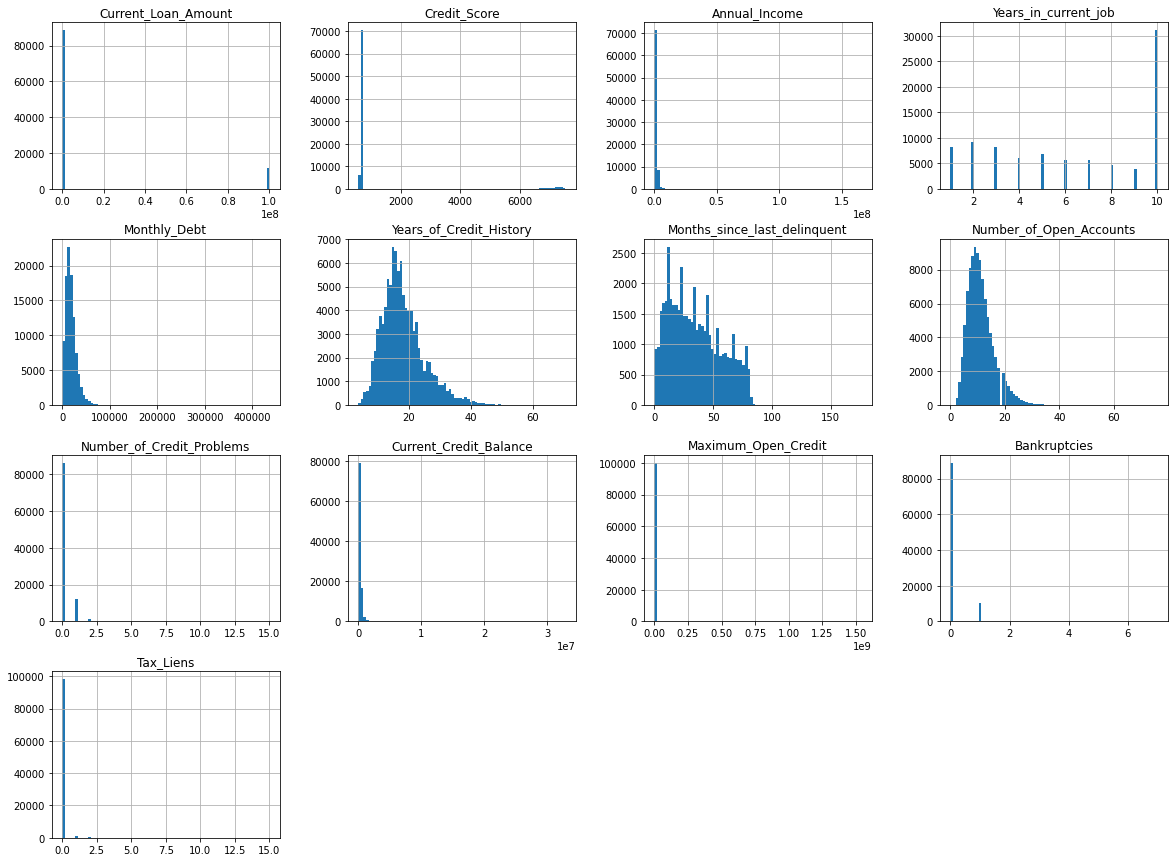

In [ ]:
dataset.hist(bins=80, figsize=(20,15))
plt.show()

**Credit_Score** column:
The distribution of the Credit_Score doesn't make sense because there are values greater than 1000 and credit score cannot be greater than 850. About 6% of data is greater than 850. The reasons the these invalid entries are not known. 

**Solution:**

1. Delete rows with credit score greater than 850.
2. Impute rows with credit score greater than 850 with mean of the column
3. Scale the credit score greater than 850 by a factor of 10 since they seem off by 10 times. 

Option 1 is selected in this case since it the safest option and 6% of the data is affected.


In [ ]:
# The distribution of Credit_Score variable doesn't make sense because credit score cannot be greater than 850
print("Number of credit score > 850: ",dataset.Credit_Score[dataset.Credit_Score>850].count())
print("Number of credit score < 850: ",dataset.Credit_Score[dataset.Credit_Score<850].count())

# drop rows where credit score is greater than 850
dataset.drop(dataset[dataset.Credit_Score > 850].index, inplace=True);

# dataset.Credit_Score = dataset.Credit_Score.apply(lambda val: (val/10) if val>850 else val)

#df.drop(df.loc[df['Credit Score']>850].index, inplace=True) # delete rows greater than 850


## Option 2: Impuate credit source greater than 850
# mean_val = df["Credit Score"].mean()
# mm = df[df['Credit Score'] < 850].mean()
# print(mm)
#df.describe()

Number of credit score > 850:  4551
Number of credit score < 850:  76295


## Taking care of missing data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95449 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_Status                   95449 non-null  object 
 1   Current_Loan_Amount           95449 non-null  float64
 2   Term                          95449 non-null  object 
 3   Credit_Score                  76295 non-null  float64
 4   Annual_Income                 76295 non-null  float64
 5   Years_in_current_job          85342 non-null  float64
 6   Home_Ownership                95449 non-null  object 
 7   Purpose                       95449 non-null  object 
 8   Monthly_Debt                  95449 non-null  float64
 9   Years_of_Credit_History       95449 non-null  float64
 10  Months_since_last_delinquent  44779 non-null  float64
 11  Number_of_Open_Accounts       95449 non-null  float64
 12  Number_of_Credit_Problems     95449 non-null  float64
 13  C

In [ ]:
dataset.isnull().sum()

Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    19154
Annual_Income                   19154
Years_in_current_job            10107
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    50670
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      194
Tax_Liens                          10
dtype: int64

Rows with missing data are imputed by the mean value of the column.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
dataset.iloc[:,[3,4,5,10,14,15,16]] = imputer.fit_transform(dataset.iloc[:,[3,4,5,10,14,15,16]])
dataset.isnull().sum()

Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [ ]:
corr = dataset.corr()
corr

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,0.133431,0.013648,-0.003521,-0.006792,0.018867,0.007516,0.002051,-0.002938,0.004065,-0.001527,-0.000992,-0.001653
Credit_Score,0.133431,1.000000,-0.004849,-0.013754,-0.080850,0.070404,0.026772,-0.026096,-0.044313,-0.015051,0.012750,-0.032700,-0.019015
Annual_Income,0.013648,-0.004849,1.000000,0.077035,0.519579,0.173324,-0.047998,0.155639,-0.020546,0.346033,0.045612,-0.051203,0.041409
Years_in_current_job,-0.003521,-0.013754,0.077035,1.000000,0.123747,0.211571,-0.007368,0.053427,0.037394,0.098142,0.002980,0.036912,0.014579
Monthly_Debt,-0.006792,-0.080850,0.519579,0.123747,1.000000,0.200237,-0.037942,0.410770,-0.057061,0.488362,0.037069,-0.079971,0.019881
Years_of_Credit_History,0.018867,0.070404,0.173324,0.211571,0.200237,1.000000,-0.029876,0.133169,0.061247,0.214579,0.030611,0.066263,0.016365
Months_since_last_delinquent,0.007516,0.026772,-0.047998,-0.007368,-0.037942,-0.029876,1.000000,-0.022106,0.080378,-0.017784,-0.003796,0.088490,0.010952
Number_of_Open_Accounts,0.002051,-0.026096,0.155639,0.053427,0.410770,0.133169,-0.022106,1.000000,-0.015373,0.233505,0.030619,-0.025830,0.006206
Number_of_Credit_Problems,-0.002938,-0.044313,-0.020546,0.037394,-0.057061,0.061247,0.080378,-0.015373,1.000000,-0.117761,-0.012102,0.754104,0.577286
Current_Credit_Balance,0.004065,-0.015051,0.346033,0.098142,0.488362,0.214579,-0.017784,0.233505,-0.117761,1.000000,0.133438,-0.127340,-0.016971


## Encoding categorical data

In [ ]:
dataset.head(10)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully Paid,445412.0,Short Term,709.00000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,34.923067,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,716.61523,1.382671e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.00000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.00000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,34.923067,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,716.61523,1.382671e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,34.923067,15.0,0.0,253460.0,427174.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.00000,1.184194e+06,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.000000,13.0,1.0,122170.0,272052.0,1.0,0.0
7,Charged Off,648714.0,Long Term,716.61523,1.382671e+06,1.0,Home Mortgage,Buy House,14806.13,8.2,8.000000,15.0,0.0,193306.0,864204.0,0.0,0.0
8,Fully Paid,548746.0,Short Term,678.00000,2.559110e+06,2.0,Rent,Debt Consolidation,18660.28,22.6,33.000000,4.0,0.0,437171.0,555038.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.00000,1.454735e+06,1.0,Rent,Debt Consolidation,39277.75,13.9,34.923067,20.0,0.0,669560.0,1021460.0,0.0,0.0
10,Fully Paid,99999999.0,Short Term,728.00000,7.146280e+05,3.0,Rent,Debt Consolidation,11851.06,16.0,76.000000,16.0,0.0,203965.0,289784.0,0.0,0.0


These columns are categorical data type:

* Loan_Status
* Term
* Home_Ownership
* Purpose



In [ ]:
print(dataset.Loan_Status.value_counts())

Fully Paid     77361
Charged Off    18088
Name: Loan_Status, dtype: int64


In [ ]:
# Label encoding for binary categories.
from sklearn.preprocessing import LabelEncoder
le_loan = LabelEncoder()
dataset.Loan_Status = le_loan.fit_transform(dataset.Loan_Status)
print(le_loan.classes_)

['Charged Off' 'Fully Paid']


In [ ]:
print(dataset.Term.value_counts())

Short Term    69369
Long Term     26080
Name: Term, dtype: int64


In [ ]:
le_term = LabelEncoder()
dataset.Term = le_term.fit_transform(dataset.Term)
print(le_term.classes_)

['Long Term' 'Short Term']


In [ ]:
print(dataset.Home_Ownership.value_counts())

Home Mortgage    46405
Rent             40089
Own Home          8748
HaveMortgage       207
Name: Home_Ownership, dtype: int64


In [ ]:
# Combine the same categories with different labels.
dataset.Home_Ownership.replace({'HaveMortgage':'Home Mortgage'},inplace=True)
print(dataset.Home_Ownership.value_counts())

Home Mortgage    46612
Rent             40089
Own Home          8748
Name: Home_Ownership, dtype: int64


In [ ]:
# Home_Ownership_dummy = pd.get_dummies(dataset.Home_Ownership,drop_first=True)
#Home_Ownership_dummy = pd.get_dummies(dataset.Home_Ownership)
#dataset.drop(['Home_Ownership'], axis=1, inplace=True)
#dataset = pd.concat([dataset, Home_Ownership_dummy], axis = 1)
#dataset.head(10)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False,dtype='int8',drop='first'), [0])], remainder='passthrough')
#ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(sparse=False,dtype='int8'), [0])], remainder='passthrough')
Home_Ownership_dummy = ct.fit_transform(dataset.Home_Ownership.to_numpy().reshape(-1,1))

Home_Ownership_dummy_df = pd.DataFrame(Home_Ownership_dummy, columns=ct.get_feature_names())
Home_Ownership_dummy_df.index = dataset.index
dataset.drop(['Home_Ownership'], axis=1, inplace=True)
dataset = pd.concat([dataset, Home_Ownership_dummy_df], axis = 1)
Home_Ownership_dummy_df.head()

,encoder__x0_Own Home,encoder__x0_Rent
0,0,0
1,0,0
2,1,0
3,1,0
4,0,1


In [ ]:
dataset.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,encoder__x0_Own Home,encoder__x0_Rent
0,1,445412.0,1,709.00000,1.167493e+06,8.0,Home Improvements,5214.74,17.2,34.923067,6.0,1.0,228190.0,416746.0,1.0,0.0,0,0
1,1,262328.0,1,716.61523,1.382671e+06,10.0,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,0,0
2,1,99999999.0,1,741.00000,2.231892e+06,8.0,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,1,0
3,1,347666.0,0,721.00000,8.069490e+05,3.0,Debt Consolidation,8741.90,12.0,34.923067,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,1,176220.0,1,716.61523,1.382671e+06,5.0,Debt Consolidation,20639.70,6.1,34.923067,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1


In [ ]:
print(dataset.Purpose.value_counts())

Debt Consolidation      74894
other                    5782
Home Improvements        5620
Other                    3143
Business Loan            1477
Buy a Car                1217
Medical Bills            1070
Buy House                 645
Take a Trip               549
major_purchase            334
small_business            262
moving                    141
wedding                   114
vacation                   96
Educational Expenses       96
renewable_energy            9
Name: Purpose, dtype: int64


In [ ]:
dataset.Purpose.replace({'other':'Other','vacation':'Take a Trip','renewable_energy':'Other'},inplace=True)
print(dataset.Purpose.value_counts())

Debt Consolidation      74894
Other                    8934
Home Improvements        5620
Business Loan            1477
Buy a Car                1217
Medical Bills            1070
Take a Trip               645
Buy House                 645
major_purchase            334
small_business            262
moving                    141
wedding                   114
Educational Expenses       96
Name: Purpose, dtype: int64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False,dtype='int8',drop='first'), [0])], remainder='passthrough')
#ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(sparse=False,dtype='int8'), [0])], remainder='passthrough')
purpose_dummy = ct.fit_transform(dataset.Purpose.to_numpy().reshape(-1,1))

purpose_dummy_df = pd.DataFrame(purpose_dummy, columns=ct.get_feature_names())
purpose_dummy_df.index = dataset.index
dataset.drop(['Purpose'], axis=1, inplace=True)
dataset = pd.concat([dataset, purpose_dummy_df], axis = 1)
purpose_dummy_df.head(15)

,encoder__x0_Buy House,encoder__x0_Buy a Car,encoder__x0_Debt Consolidation,encoder__x0_Educational Expenses,encoder__x0_Home Improvements,encoder__x0_Medical Bills,encoder__x0_Other,encoder__x0_Take a Trip,encoder__x0_major_purchase,encoder__x0_moving,encoder__x0_small_business,encoder__x0_wedding
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.head(15)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,encoder__x0_Own Home,encoder__x0_Rent,encoder__x0_Buy House,encoder__x0_Buy a Car,encoder__x0_Debt Consolidation,encoder__x0_Educational Expenses,encoder__x0_Home Improvements,encoder__x0_Medical Bills,encoder__x0_Other,encoder__x0_Take a Trip,encoder__x0_major_purchase,encoder__x0_moving,encoder__x0_small_business,encoder__x0_wedding
0,1,445412.0,1,709.00000,1.167493e+06,8.0,5214.74,17.2,34.923067,6.0,1.0,228190.0,416746.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,262328.0,1,716.61523,1.382671e+06,10.0,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,99999999.0,1,741.00000,2.231892e+06,8.0,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,347666.0,0,721.00000,8.069490e+05,3.0,8741.90,12.0,34.923067,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,176220.0,1,716.61523,1.382671e+06,5.0,20639.70,6.1,34.923067,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6,1,217646.0,1,730.00000,1.184194e+06,1.0,10855.08,19.6,10.000000,13.0,1.0,122170.0,272052.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,648714.0,0,716.61523,1.382671e+06,1.0,14806.13,8.2,8.000000,15.0,0.0,193306.0,864204.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,1,548746.0,1,678.00000,2.559110e+06,2.0,18660.28,22.6,33.000000,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9,1,215952.0,1,739.00000,1.454735e+06,1.0,39277.75,13.9,34.923067,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
10,1,99999999.0,1,728.00000,7.146280e+05,3.0,11851.06,16.0,76.000000,16.0,0.0,203965.0,289784.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95449 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Loan_Status                       95449 non-null  int64  
 1   Current_Loan_Amount               95449 non-null  float64
 2   Term                              95449 non-null  int64  
 3   Credit_Score                      95449 non-null  float64
 4   Annual_Income                     95449 non-null  float64
 5   Years_in_current_job              95449 non-null  float64
 6   Monthly_Debt                      95449 non-null  float64
 7   Years_of_Credit_History           95449 non-null  float64
 8   Months_since_last_delinquent      95449 non-null  float64
 9   Number_of_Open_Accounts           95449 non-null  float64
 10  Number_of_Credit_Problems         95449 non-null  float64
 11  Current_Credit_Balance            95449 non-null  float64
 12  Maxi

In [ ]:
corr = dataset.corr()
corr

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,encoder__x0_Own Home,encoder__x0_Rent,encoder__x0_Buy House,encoder__x0_Buy a Car,encoder__x0_Debt Consolidation,encoder__x0_Educational Expenses,encoder__x0_Home Improvements,encoder__x0_Medical Bills,encoder__x0_Other,encoder__x0_Take a Trip,encoder__x0_major_purchase,encoder__x0_moving,encoder__x0_small_business,encoder__x0_wedding
Loan_Status,1.000000,0.178637,0.102686,0.086259,0.053014,0.004921,-0.008029,0.021560,0.008986,-0.010073,-0.003047,0.011437,0.007843,0.005151,-0.008838,-0.000947,-0.048420,0.004970,0.018020,-0.004374,0.002692,0.013743,-0.004629,0.002389,0.002359,-0.000319,-0.005067,-0.024704,-0.000307
Current_Loan_Amount,0.178637,1.000000,0.057157,0.133431,0.013648,-0.003521,-0.006792,0.018867,0.007516,0.002051,-0.002938,0.004065,-0.001527,-0.000992,-0.001653,-0.002181,-0.008905,-0.001779,0.008381,0.003608,0.002365,0.005326,0.000369,-0.005917,-0.003388,0.002509,0.002422,-0.003389,0.005809
Term,0.102686,0.057157,1.000000,0.417895,-0.092483,-0.064215,-0.157660,-0.040610,0.011087,-0.082059,0.026256,-0.108102,-0.008467,0.028186,0.004020,0.008251,0.109927,-0.001941,0.011426,-0.046061,0.014263,-0.019518,0.022188,0.054491,0.033357,0.002891,0.008892,0.002061,0.008950
Credit_Score,0.086259,0.133431,0.417895,1.000000,-0.004849,-0.013754,-0.080850,0.070404,0.026772,-0.026096,-0.044313,-0.015051,0.012750,-0.032700,-0.019015,-0.011402,-0.033667,-0.036532,0.027613,0.072650,0.006053,0.008602,-0.025345,-0.066161,-0.011334,0.009532,-0.020958,-0.027419,-0.001129
Annual_Income,0.053014,0.013648,-0.092483,-0.004849,1.000000,0.077035,0.519579,0.173324,-0.047998,0.155639,-0.020546,0.346033,0.045612,-0.051203,0.041409,-0.041984,-0.161950,0.010171,-0.017329,-0.031390,-0.009882,0.071926,0.005148,-0.022180,-0.012684,0.003294,0.010030,0.008841,0.002690
Years_in_current_job,0.004921,-0.003521,-0.064215,-0.013754,0.077035,1.000000,0.123747,0.211571,-0.007368,0.053427,0.037394,0.098142,0.002980,0.036912,0.014579,0.008858,-0.192677,-0.018904,-0.024858,0.044121,-0.015239,0.024808,-0.003939,-0.045250,-0.002670,-0.016130,-0.013509,-0.008939,-0.018046
Monthly_Debt,-0.008029,-0.006792,-0.157660,-0.080850,0.519579,0.123747,1.000000,0.200237,-0.037942,0.410770,-0.057061,0.488362,0.037069,-0.079971,0.019881,-0.036426,-0.187174,-0.022477,-0.049590,0.098426,-0.015542,-0.013244,-0.005523,-0.078041,-0.017597,-0.020576,0.000491,-0.010460,-0.010871
Years_of_Credit_History,0.021560,0.018867,-0.040610,0.070404,0.173324,0.211571,0.200237,1.000000,-0.029876,0.133169,0.061247,0.214579,0.030611,0.066263,0.016365,0.029534,-0.199055,-0.013968,-0.008616,0.013149,0.008023,0.027702,0.012906,-0.030751,-0.013208,-0.006800,-0.007481,-0.004085,-0.013308
Months_since_last_delinquent,0.008986,0.007516,0.011087,0.026772,-0.047998,-0.007368,-0.037942,-0.029876,1.000000,-0.022106,0.080378,-0.017784,-0.003796,0.088490,0.010952,-0.002811,0.037282,-0.003595,0.002035,0.015242,-0.006907,-0.006756,-0.010655,-0.010994,0.004428,-0.002164,0.000519,-0.004034,0.001692
Number_of_Open_Accounts,-0.010073,0.002051,-0.082059,-0.026096,0.155639,0.053427,0.410770,0.133169,-0.022106,1.000000,-0.015373,0.233505,0.030619,-0.025830,0.006206,-0.007681,-0.130366,-0.018449,-0.036877,0.113386,-0.004794,-0.019637,-0.014221,-0.090626,-0.020929,-0.020188,0.002781,-0.015593,-0.011626


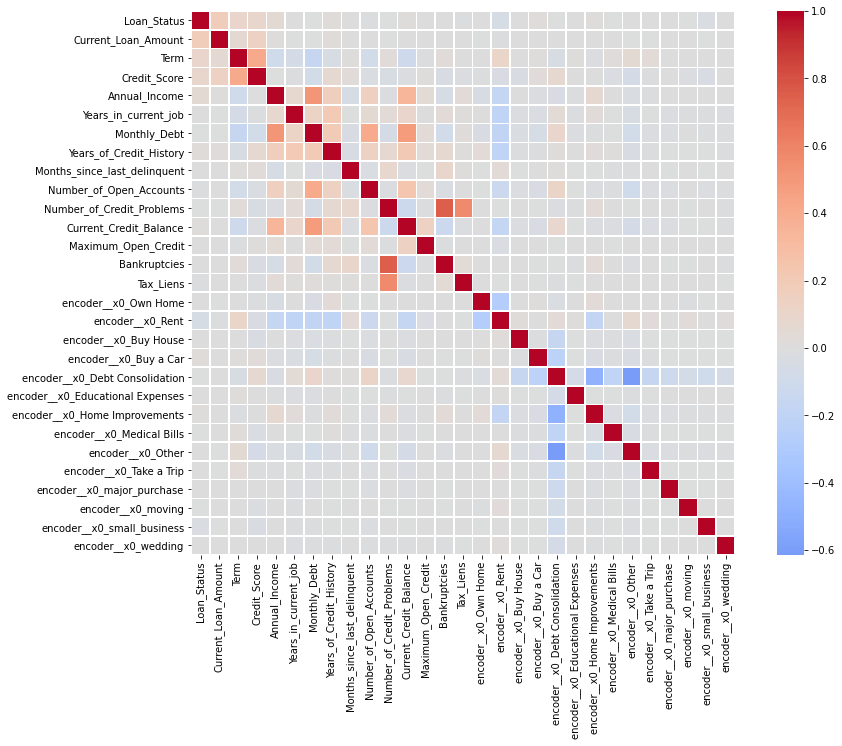

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,  center=0, square=True, linewidths=.5,cmap='coolwarm');

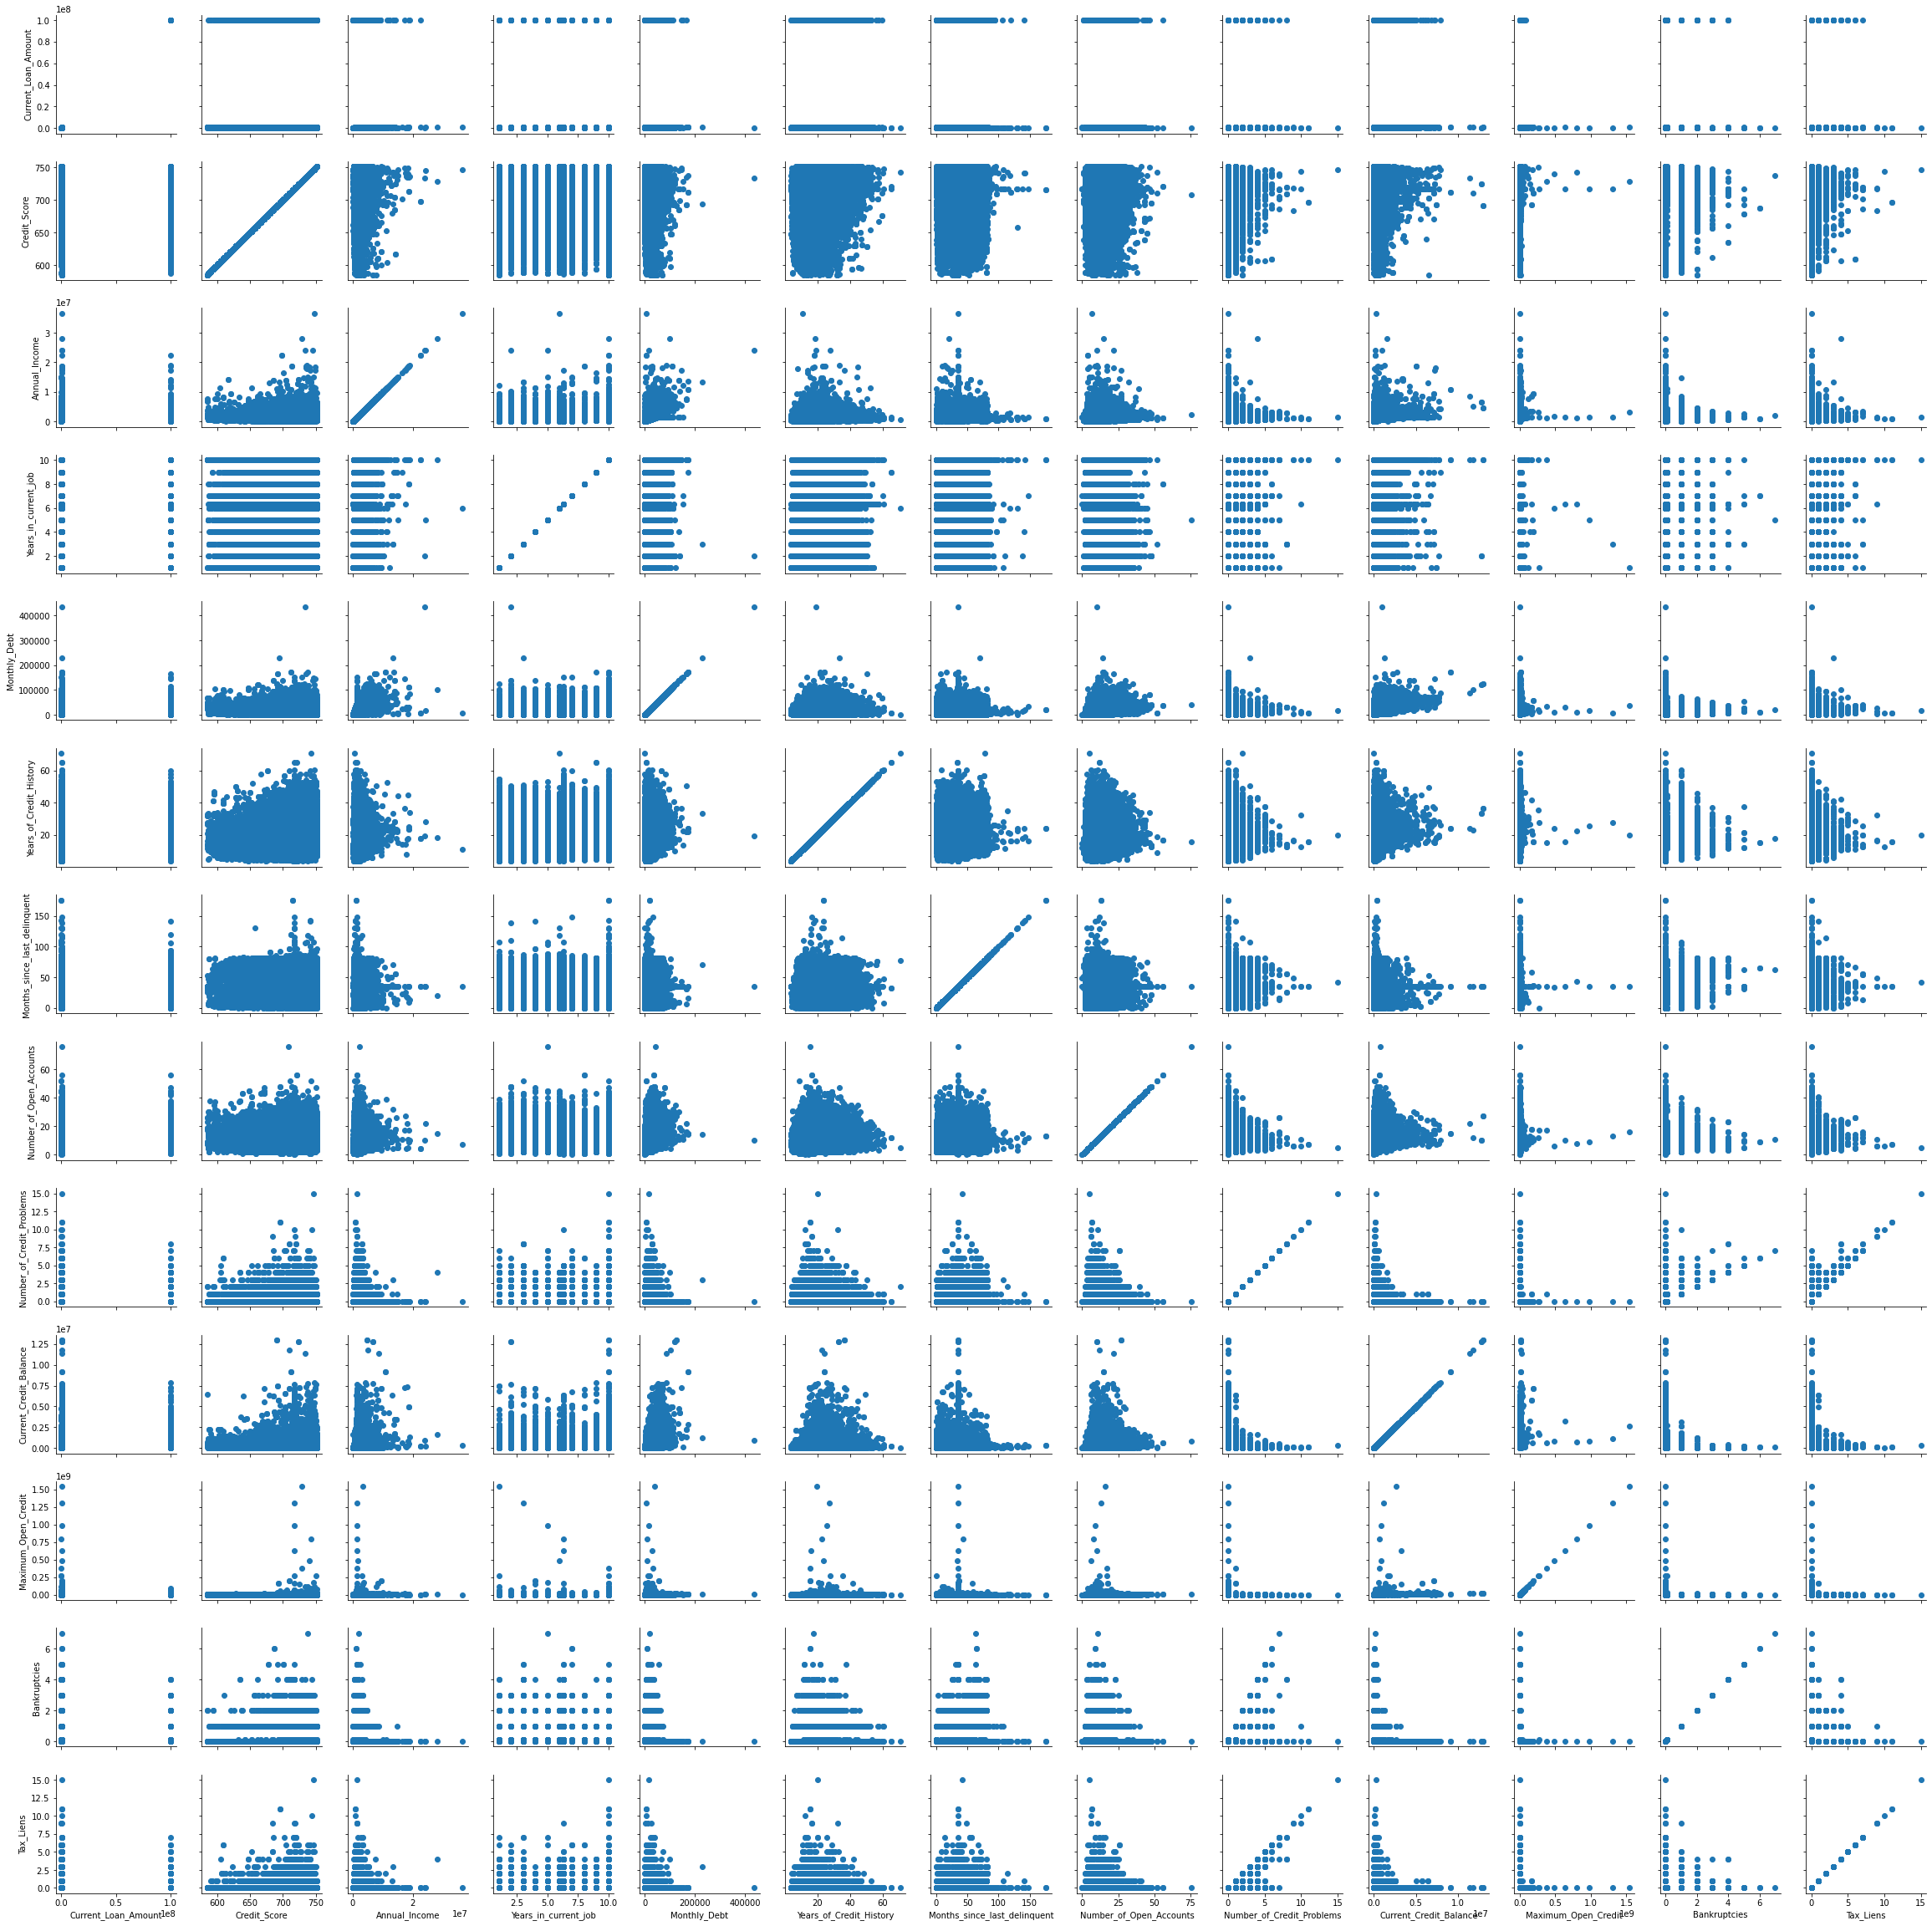

In [ ]:
g = sns.PairGrid(dataset.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14]])
g.map(plt.scatter);

# Splitting the dateset into the training and test sets

## Get the y array and X matrix

In [ ]:
y = dataset.loc[:,'Loan_Status'].values
X = dataset.iloc[:,1:].values

In [ ]:
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
print(X[0])

[4.45412000e+05 1.00000000e+00 7.09000000e+02 1.16749300e+06
 8.00000000e+00 5.21474000e+03 1.72000000e+01 3.49230666e+01
 6.00000000e+00 1.00000000e+00 2.28190000e+05 4.16746000e+05
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


## Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#X_train[0]

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# X_train[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]] = sc.fit_transform(X_train[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]])
# X_test[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]] = sc.transform(X_test[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]])

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#X_train[0]

# Training the Models

## Logistic Regression

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
startTime = time.time()
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
elapsedTime = time.time()-startTime

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

model_labels = []
model_accuracies = []
model_precisions = []
model_recalls = []
model_f1s = []
model_times = []

def display_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Purples, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

def evaulation_matrices(classifier_name, y_test, y_pred, elapsedTime):
    model_labels.append(classifier_name)
    model_accuracies.append(accuracy_score(y_test, y_pred))
    model_precisions.append(precision_score(y_test, y_pred))
    model_recalls.append(recall_score(y_test, y_pred))
    model_f1s.append(f1_score(y_test, y_pred))
    model_times.append(elapsedTime)

    print(model_labels[-1])
    print('Accuracy Score: \t{:.2f} %'.format(model_accuracies[-1]*100))
    print('Precision Score: \t{:.2f} %'.format(model_precisions[-1]*100))
    print('Recall Score: \t\t{:.2f} %'.format(model_recalls[-1]*100))
    print('F1 Score: \t\t{:.2f} %'.format(model_f1s[-1]*100))
    print('Run Time: \t\t{:.2f} s'.format(model_times[-1]))

def 
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100)) 
print(Standard deviation: {:.2f} %'.format(accuracies.std()*100)) 

Logistic Regression
Accuracy Score: 	81.05 %
Precision Score: 	81.07 %
Recall Score: 		99.97 %
F1 Score: 		89.53 %
Run Time: 		0.80 s


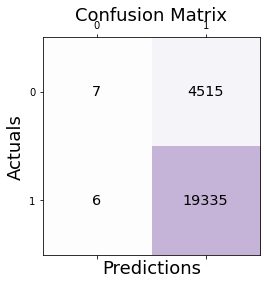

In [ ]:
evaulation_matrices('Logistic Regression', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## K-nearest Neigbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
startTime = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
elapsedTime = time.time()-startTime

KNN
Accuracy Score: 	78.33 %
Precision Score: 	82.07 %
Recall Score: 		93.74 %
F1 Score: 		87.52 %
Run Time: 		193.26 s


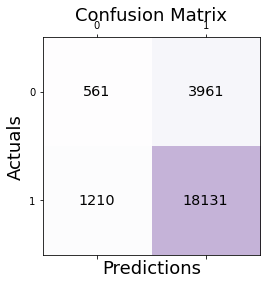

In [ ]:
evaulation_matrices('KNN', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## Support Vector Machine (SVM)

### Linear

In [ ]:
from sklearn.svm import SVC
startTime = time.time()
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
elapsedTime = time.time()-startTime

SVM
Accuracy Score: 	81.05 %
Precision Score: 	81.05 %
Recall Score: 		100.00 %
F1 Score: 		89.53 %
Run Time: 		267.50 s


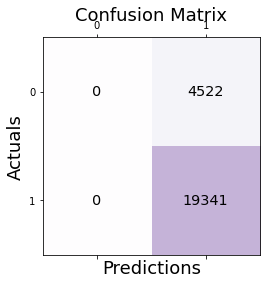

In [ ]:
evaulation_matrices('SVM', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

### Grid Search to find the best model parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.25, 0.5, 0.75, 0.9]} ]
grid_search = GridSearchCV(estimator = svm_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuarcy_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: {:.2f} %'.format(best_accuarcy_score*100))
print('Best Parameters: ', best_parameters)

# Best Accuracy: 81.10 %
# Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Best Accuracy: 81.10 %
Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (mean_score, params)

0.8106613047248619 {'C': 0.25, 'kernel': 'linear'}
0.8106613047248619 {'C': 0.5, 'kernel': 'linear'}
0.8106613047248619 {'C': 0.75, 'kernel': 'linear'}
0.8106613047248619 {'C': 1, 'kernel': 'linear'}
0.8107870264612984 {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}
0.8106613047248619 {'C': 0.25, 'gamma': 0.25, 'kernel': 'rbf'}
0.8106613047248619 {'C': 0.25, 'gamma': 0.5, 'kernel': 'rbf'}
0.8106613047248619 {'C': 0.25, 'gamma': 0.75, 'kernel': 'rbf'}
0.8106613047248619 {'C': 0.25, 'gamma': 0.9, 'kernel': 'rbf'}
0.8108568686180243 {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8108009948926433 {'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}
0.8107032119703407 {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.8106193935764964 {'C': 0.5, 'gamma': 0.75, 'kernel': 'rbf'}
0.8106193994308264 {'C': 0.5, 'gamma': 0.9, 'kernel': 'rbf'}
0.8108987719606164 {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}
0.8106892357332223 {'C': 0.75, 'gamma': 0.25, 'kernel': 'rbf'}
0.8106612871618719 {'C': 0.75, 'gamma': 0.5, 'kernel': '

### Kernel

In [ ]:
from sklearn.svm import SVC
startTime = time.time()
svmk_classifier = SVC(kernel = 'rbf', gamma = 0.1, C = 1.0)
svmk_classifier.fit(X_train, y_train)
y_pred = svmk_classifier.predict(X_test)
elapsedTime = time.time()-startTime

Kernal SVM
Accuracy Score: 	81.07 %
Precision Score: 	81.08 %
Recall Score: 		99.96 %
F1 Score: 		89.54 %
Run Time: 		2668.39 s


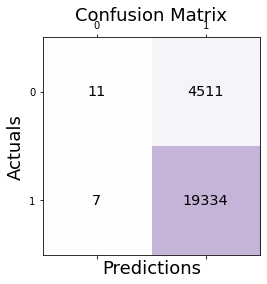

In [ ]:
evaulation_matrices('Kernal SVM', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
startTime = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
elapsedTime = time.time()-startTime

Naive Bayes
Accuracy Score: 	33.43 %
Precision Score: 	96.65 %
Recall Score: 		18.51 %
F1 Score: 		31.07 %
Run Time: 		0.07 s


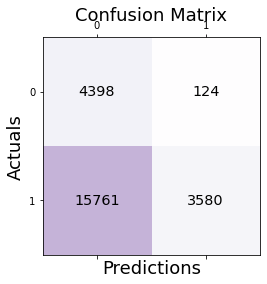

In [ ]:
evaulation_matrices('Naive Bayes', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
startTime = time.time()
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
elapsedTime = time.time()-startTime

Decision Tree
Accuracy Score: 	74.05 %
Precision Score: 	83.66 %
Recall Score: 		84.48 %
F1 Score: 		84.07 %
Run Time: 		2.08 s


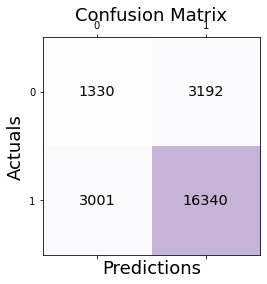

In [ ]:
evaulation_matrices('Decision Tree', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
startTime = time.time()
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
elapsedTime = time.time()-startTime

Random Forest
Accuracy Score: 	79.22 %
Precision Score: 	82.56 %
Recall Score: 		94.27 %
F1 Score: 		88.03 %
Run Time: 		3.08 s


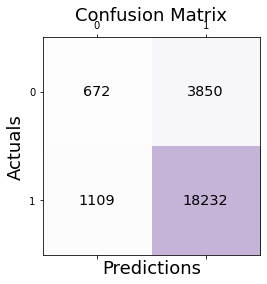

In [ ]:
evaulation_matrices('Random Forest', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
startTime = time.time()
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
elapsedTime = time.time()-startTime

XGBoost
Accuracy Score: 	81.07 %
Precision Score: 	81.07 %
Recall Score: 		99.99 %
F1 Score: 		89.54 %
Run Time: 		7.58 s


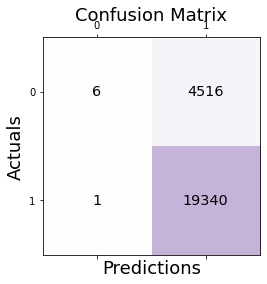

In [ ]:
evaulation_matrices('XGBoost', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## Artifical Neural Network (ANN)

In [ ]:
import tensorflow as tf

startTime = time.time()

# initializing the ANN
ann = tf.keras.models.Sequential()

# adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

# adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training the ann
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

# predicting the test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

elapsedTime = time.time()-startTime

Epoch 1/10
2238/2238 [==============================] - 4s 2ms/step - loss: 0.4653 - accuracy: 0.8055
Epoch 2/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8103
Epoch 3/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8104
Epoch 4/10
2238/2238 [==============================] - 4s 2ms/step - loss: 0.4479 - accuracy: 0.8106
Epoch 5/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4474 - accuracy: 0.8105
Epoch 6/10
2238/2238 [==============================] - 3s 1ms/step - loss: 0.4469 - accuracy: 0.8107
Epoch 7/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4464 - accuracy: 0.8106
Epoch 8/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.8107
Epoch 9/10
2238/2238 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.8105
Epoch 10/10
2238/2238 [==============================] - 3s 1ms/step - loss: 0.445

ANN
Accuracy Score: 	81.05 %
Precision Score: 	81.16 %
Recall Score: 		99.78 %
F1 Score: 		89.52 %
Run Time: 		36.06 s


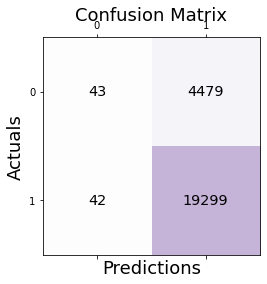

In [ ]:
evaulation_matrices('ANN', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

## CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
startTime = time.time()
cat_classifier = CatBoostClassifier()
cat_classifier.fit(X_train, y_train)
y_pred = cat_classifier.predict(X_test)
elapsedTime = time.time()-startTime

     |████████████████████████████████| 67.4 MB 28 kB/s 
Learning rate set to 0.063818
0:	learn: 0.6540786	total: 81.2ms	remaining: 1m 21s
1:	learn: 0.6245141	total: 110ms	remaining: 54.8s
2:	learn: 0.6031027	total: 138ms	remaining: 46s
3:	learn: 0.5779085	total: 172ms	remaining: 42.7s
4:	learn: 0.5629525	total: 207ms	remaining: 41.3s
5:	learn: 0.5493795	total: 238ms	remaining: 39.4s
6:	learn: 0.5381559	total: 268ms	remaining: 38s
7:	learn: 0.5283634	total: 305ms	remaining: 37.8s
8:	learn: 0.5171284	total: 333ms	remaining: 36.6s
9:	learn: 0.5095985	total: 364ms	remaining: 36.1s
10:	learn: 0.5028650	total: 395ms	remaining: 35.5s
11:	learn: 0.4922313	total: 432ms	remaining: 35.5s
12:	learn: 0.4876820	total: 463ms	remaining: 35.1s
13:	learn: 0.4839872	total: 501ms	remaining: 35.3s
14:	learn: 0.4806610	total: 531ms	remaining: 34.8s
15:	learn: 0.4775457	total: 561ms	remaining: 34.5s
16:	learn: 0.4744381	total: 595ms	remaining: 34.4s
17:	learn: 0.4721608	total: 625ms	remaining: 34.1s
18:	lea

CatBoost
Accuracy Score: 	81.26 %
Precision Score: 	81.57 %
Recall Score: 		99.33 %
F1 Score: 		89.58 %
Run Time: 		34.09 s


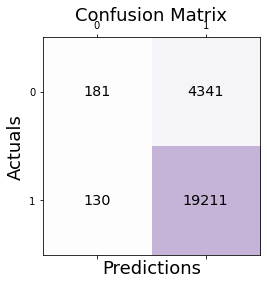

In [ ]:
evaulation_matrices('CatBoost', y_test, y_pred, elapsedTime)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display_confusion_matrix(conf_matrix)

# Compare Performances

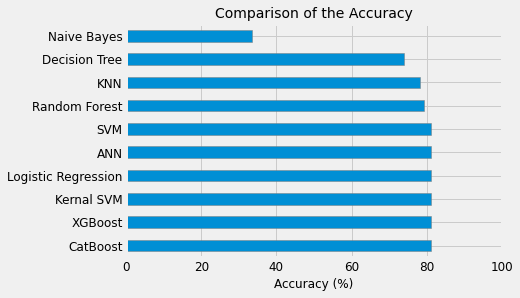

In [ ]:
plt.style.use('fivethirtyeight');
model_comparison = pd.DataFrame({'model': model_labels, 'score': np.array(model_accuracies)*100});
model_comparison.sort_values('score', ascending = False).plot(x = 'model', y = 'score', kind = 'barh', edgecolor = 'gray');
plt.ylabel(''); plt.yticks(size = 12); plt.xlabel('Accuracy (%)',size = 12); plt.xticks(size = 12);
plt.title('Comparison of the Accuracy', size = 14); plt.xlim([0, 100]); plt.legend().set_visible(False);

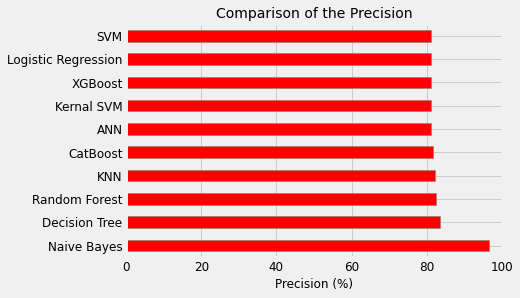

In [ ]:
plt.style.use('fivethirtyeight');
model_comparison = pd.DataFrame({'model': model_labels, 'score': np.array(model_precisions)*100});
model_comparison.sort_values('score', ascending = False).plot(x = 'model', y = 'score', kind = 'barh', color = 'red' ,edgecolor = 'gray');
plt.ylabel(''); plt.yticks(size = 12); plt.xlabel('Precision (%)',size = 12); plt.xticks(size = 12);
plt.title('Comparison of the Precision', size = 14); plt.xlim([0, 100]); plt.legend().set_visible(False);

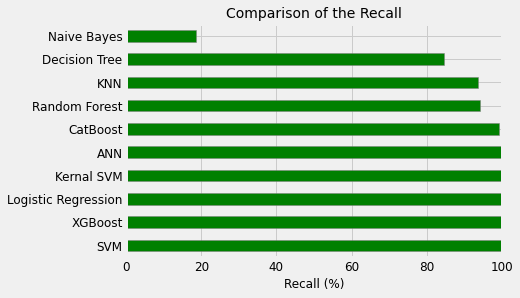

In [ ]:
plt.style.use('fivethirtyeight');
model_comparison = pd.DataFrame({'model': model_labels, 'score': np.array(model_recalls)*100});
model_comparison.sort_values('score', ascending = False).plot(x = 'model', y = 'score', kind = 'barh', color = 'green' ,edgecolor = 'gray');
plt.ylabel(''); plt.yticks(size = 12); plt.xlabel('Recall (%)',size = 12); plt.xticks(size = 12);
plt.title('Comparison of the Recall', size = 14); plt.xlim([0, 100]); plt.legend().set_visible(False);

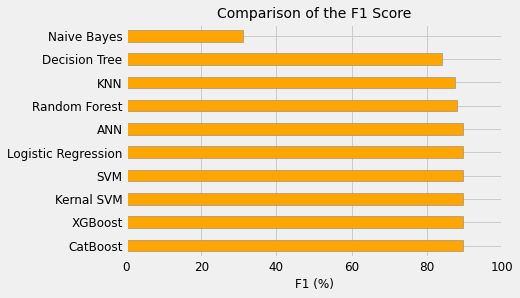

In [ ]:
plt.style.use('fivethirtyeight');
model_comparison = pd.DataFrame({'model': model_labels, 'score': np.array(model_f1s)*100});
model_comparison.sort_values('score', ascending = False).plot(x = 'model', y = 'score', kind = 'barh', color = 'orange' ,edgecolor = 'gray');
plt.ylabel(''); plt.yticks(size = 12); plt.xlabel('F1 (%)',size = 12); plt.xticks(size = 12);
plt.title('Comparison of the F1 Score', size = 14); plt.xlim([0, 100]); plt.legend().set_visible(False);

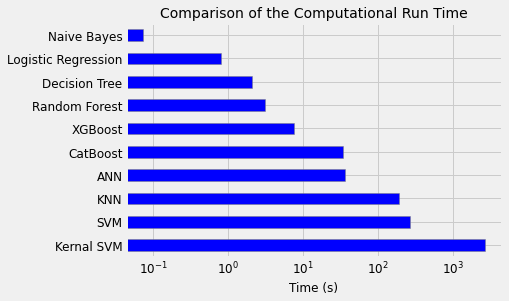

In [ ]:
plt.style.use('fivethirtyeight')
model_comparison = pd.DataFrame({'model': model_labels, 'score': model_times})
model_comparison.sort_values('score', ascending = False).plot(x = 'model', y = 'score', kind = 'barh', color = 'blue', edgecolor = 'gray');
plt.ylabel(''); plt.yticks(size = 12); plt.xlabel('Time (s)',size = 12); plt.xticks(size = 12); plt.xscale("log")
plt.title('Comparison of the Computational Run Time', size = 14); plt.legend().set_visible(False);

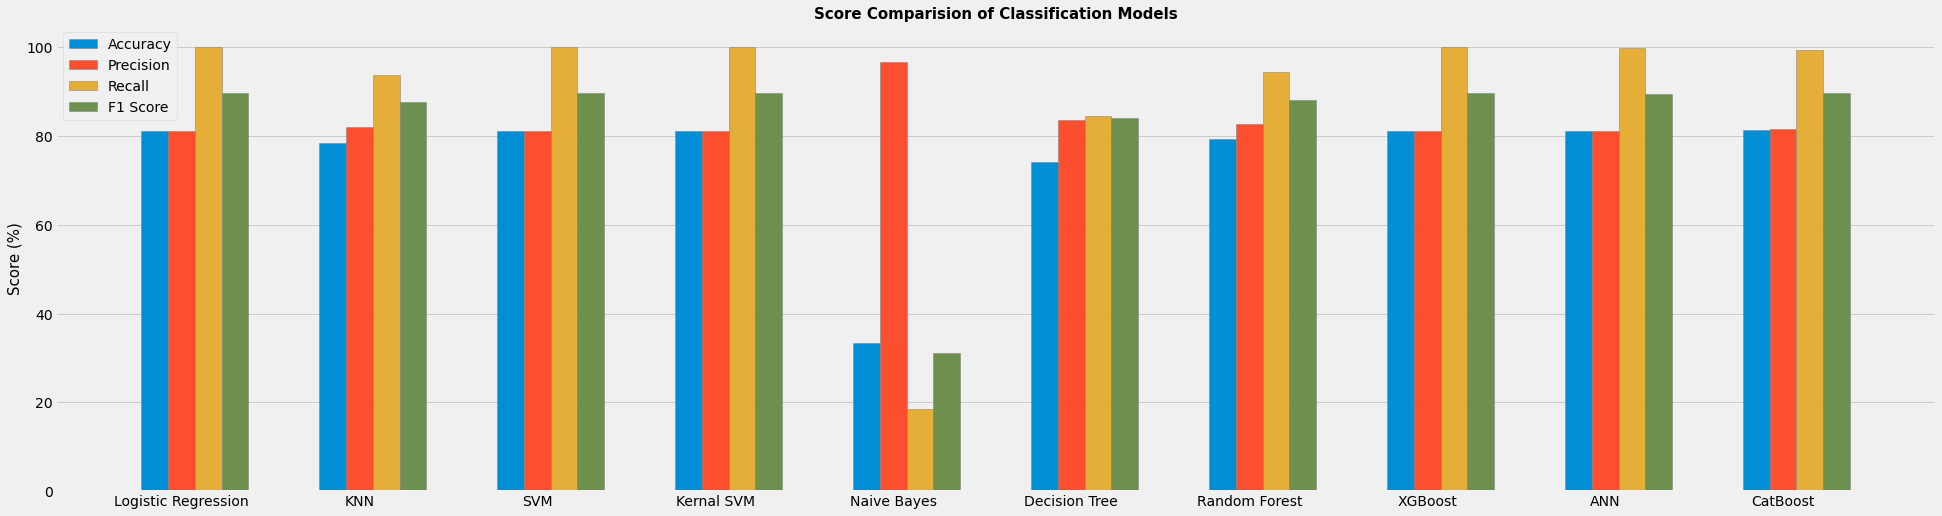

In [ ]:
data = [model_accuracies, model_precisions, model_recalls, model_f1s]

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(30, 8))

# Set position of bar on x-axis
br1 = np.arange(len(model_accuracies))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, np.array(model_accuracies)*100, width = barWidth, edgecolor ='grey', label ='Accuracy')
plt.bar(br2, np.array(model_precisions)*100, width = barWidth, edgecolor ='grey', label ='Precision')
plt.bar(br3, np.array(model_recalls)*100, width = barWidth, edgecolor ='grey', label ='Recall')
plt.bar(br4, np.array(model_f1s)*100, width = barWidth, edgecolor ='grey', label ='F1 Score')

plt.title('Score Comparision of Classification Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Score (%)', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(model_accuracies))], model_labels)

plt.grid(axis='x')
plt.legend()
plt.show()

In [ ]:
print(f'{model_labels[model_accuracies.index(max(model_accuracies))]} had the highest accuracy with a score of {model_accuracies[model_accuracies.index(max(model_accuracies))]*100:.2f} %')
print(f'{model_labels[model_precisions.index(max(model_precisions))]} had the highest precision with a score of {model_precisions[model_precisions.index(max(model_precisions))]*100:.2f} %')
print(f'{model_labels[model_recalls.index(max(model_recalls))]} had the highest recall with a score of {model_recalls[model_recalls.index(max(model_recalls))]*100:.2f} %')
print(f'{model_labels[model_f1s.index(max(model_f1s))]} had the highest F1 with a score of {model_f1s[model_f1s.index(max(model_f1s))]*100:.2f} %')
print(f'{model_labels[model_times.index(min(model_times))]} had the lowest run time with a run time of {model_times[model_times.index(min(model_times))]:.2f} s')

CatBoost had the highest accuracy with a score of 81.26 %
Naive Bayes had the highest precision with a score of 96.65 %
SVM had the highest recall with a score of 100.00 %
CatBoost had the highest F1 with a score of 89.58 %
Naive Bayes had the lowest run time with a run time of 0.07 s
